## **Logistic Regreesion**

#### **Logistic Regression Classifier**

[기존 접근(회귀 등)의 문제점들]
- 1이상 또는 0이하의 수들이 나오는걸 어떻게 해석?
- 1또는 0으로 정확히 표현 가능한가?
- 변수가 Y에 영향을 주는 정도가 비례하는가?
- **확률로 발생할 사건의 가능성을 표현해야함**

**Solution : 확률로 나타내자 !**
- sigmoid 등으로 확률로 표현하여 예를들어 0.5보다 크면 True, 작으면 False 등으로 판별

#### **[Sigmoid Function]**
- 분류의 가능성을 확률로 얘기하기

**[Odds Ratio]** : 특정 사건이 일어날 확률과 일어나지 않을 확률의 비율
> $\frac{P(X)}{1-P(X)} = \frac{일어날확률}{일어나지않을확률}$

**[Logit function]** : X값이 주어졌을 때, y의 확률을 이용한 log odds
> $logit(p(y=1|x)) = log_{e} (\frac{p}{1-p})$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $= log_{e} (p) - log_{e} (1-p)$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$= -log_{e} (\frac{1}{p} - 1) $

**[Sigmoid(=Logsitic) Function]** : Logit함수의 역함수로 z에 관한 확률을 산출
> $f(z) = y = -log_{e} (\frac{1}{z} -1)$ 이걸 역함수로 바꾸면<br>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$z = -log_{e} (\frac{1}{y} - 1)$ y에 관한 정리
- **우리가 원하는 확률값을 결과값으로 뱉음 !**<br>
> $z = -log_{e} (\frac{1}{y} - 1)$ <br>
> $e^{(-z)} = \frac{1-y}{y}$ <br>
> $y * e^{(-z)} + y = 1$ <br>
> $y(e^{(-z)} + 1) = 1$ <br>
> <span style = 'background-color: #fff5b1'>$y = \frac{1}{1+e^{(-z)}}$</span>
- Logistic Function = Inverse of logit function
- **미분가능한 연속구간**으로 변환, S자 형태를 닮아서 sigmoid function

![img](https://ifh.cc/g/5YMwcJ.png)

> $log_{e} (\frac{1-p}{p}) = z = w_0 x_0 + w_1 x_1 + \cdots +w_n x_n$
- z값을 찾아서 어떤 사건이 일어날 확률값을 구한다.

#### **[Logistic Regression에서 Weight 학습하기]**

**[가설함수]**
> $h_\theta (x) = g(z) = \frac{1}{1 + e^{-z}}$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ($0 \le h_\theta (x) \le 1$)<br>
> where : <br>
> &nbsp;&nbsp;$z = w_0 x_0 + w_1 x_1 + \cdots +w_n x_n$<br>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$ = \theta^T x$

- <span style = 'background-color: #fff5b1'> h함수는 확률값을 뱉어낸다 !</span>

![img](https://ifh.cc/g/5YMwcJ.png)
- thereshold를 어떤값으로 하느냐에 따라 그값보다 크면 사건발생, 작으면 사건발생X로 보통 판별한다.

**[Training theta]**
> $h_\theta (x) = \frac{1}{1 + e^{-\theta T X}}$ <br>
> $\theta^T X = w_0 x_0 + w_1 x_1 + \cdots +w_n x_n$<br>
> y = 0 or 1

#### **[Cost Function] - 정답과 예측치의 차이**
- y가 1일 때, y가 0일 때로 나눠서 cost function 계산
- y가 1일 때는, 가설함수의 값이 커질수록(사건이 발생했다고 예측할수록) cost값이 작아진다.
- y가 0일 때는, 가설함수의 값이 작아질수록(사건이 발생하지않았다고 예측할수록) cost값이 작아진다.
> $ Cost(h_\theta(x), y)=
> \begin{cases}
> -log(h_\theta(x)),\; if \; y = 1 \\
> -log(1 - h_\theta(x)),\; if \; y = 0
> \end{cases}$

![img](https://ifh.cc/g/pdLDWT.png)

- 위의 함수식에서 $y=0$일 때, $y=1$일 때 둘 다를 하나의 식으로 합치면
> $\begin{matrix}
>J(\theta) &=& \frac{1}{m} \sum_{i=1}^m Cost(h_\theta (x^{(i)}), y^{(i)}) \\
>       &=& -\frac{1}{m} \sum_{i=1}^m [y^{(i)}logh_\theta (x^{(i)}) + (1 - y^{(i)})log(1-h_\theta (x^{(i)}))]
>\end{matrix}$

- **Cost function($J(\theta)$)를 최소화하는 $\theta$를 찾는게 우리의 목표 !**<br>
- 우선 $J(\theta)$를 정리하면

> $\begin{matrix}
> J(\theta) &=& -\frac{1}{m} \sum_{i=1}^m [-y^{(i)}(log(1 + e^{-\theta x^i})) + (1 - y^i)(-\theta x^i - log(1 + e^{-\theta x^i}))] \\
>           &=& -\frac{1}{m} \sum_{i=1}^m [y_i \theta x^i - \theta x^i - log(1 + e^{-\theta x^i})] \\
            &=& -\frac{1}{m} \sum_{i=1}^m [y_i \theta x^i - log(1 + e^{\theta x^i})]
> \end{matrix}$

- 위식을 $\theta$에 관하여 미분하면

> $\frac{\partial}{\partial \theta_j} y_i \theta x^i = y_i x^i_j$ <br>
> $\frac{\partial}{\partial \theta_j} log(1 + e^{\theta x^i}) = \frac{x^i_j e^{\theta x^i}}{1 + e^\theta x^i} = x^i_j h_\theta(x^i)$

> **<span style = 'background-color: #fff5b1'>따라서!!</span>** **$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h_\theta(x^i) - y^i)x^i_j$** <br><br><br>
> $\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$ <br>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$:=\theta_j - \alpha \sum_{i=1}^m (h_\theta(x^i) - y^i)x^i_j$
- **모든 $\theta_j$ 동시에 업데이트**

<br><br>
#### **Numpy implementation**
- Logistic Regression을 Numpy로 구현하기

- Data : 데이터 과학자로써의 경력과 소득을 통한 유료계정 전환여부를 **예측**하는문제

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = np.array(list(map(list, data))) # 튜플을 리스트로 바꾸기
paid_data = data[np.where(data[:,2] == 1)]
unpaid_data = data[np.where(data[:,2] == 0)]

In [4]:
unpaid_data[:3]

array([[1.9e+00, 4.8e+04, 0.0e+00],
       [4.2e+00, 6.3e+04, 0.0e+00],
       [6.0e+00, 7.6e+04, 0.0e+00]])

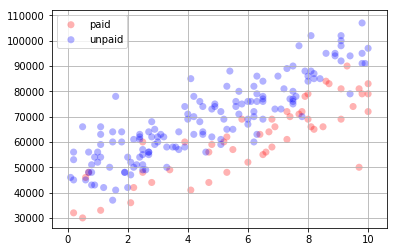

In [5]:
fig, ax = plt.subplots()

x, y = paid_data[:, 0], paid_data[:, 1]
scale = 50.0
ax.scatter(x, y, c="red", s=scale, label="paid", alpha=0.3, edgecolors='none')

x,y = unpaid_data[:, 0], unpaid_data[:, 1]
scale = 50.0
ax.scatter(x, y, c="blue", s=scale, label="unpaid", alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

**Data normalize** - 데이터 스케일링

In [6]:
from sklearn.preprocessing import normalize

data[:, :2] = normalize(data[:, :2], axis=0)
data[:5]

array([[0.00861027, 0.04956583, 1.        ],
       [0.02337075, 0.04956583, 0.        ],
       [0.03075098, 0.06195729, 1.        ],
       [0.05166165, 0.06505516, 0.        ],
       [0.07380236, 0.07847924, 0.        ]])

In [7]:
# data의 각 원소의 1번째까지 잘라서 x_data로 선언, y도 같은원리
x_data = data[:, :2]
x_data = np.insert(x_data, 0, 1, axis=1)

y_data = data[:, -1]
y_data = y_data.reshape(y_data.shape[0], 1)

x_data.shape, y_data.shape

((200, 3), (200, 1))

In [8]:
x_data[:3]

array([[1.        , 0.00861027, 0.04956583],
       [1.        , 0.02337075, 0.04956583],
       [1.        , 0.03075098, 0.06195729]])

In [9]:
y_data[:3]

array([[1.],
       [0.],
       [1.]])

**Sigmoid function**
>$h_{\theta}(x) = g(x) = \frac{1}{1+e^{(-z)}}$
- 이 부분 구현, 부호 등 디테일구현도 중요

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**Hypothesis function**
> $h_{\theta}(x) = \frac{1}{1 + e^{-\theta T x}}$
- sigmoid function과의 차이 : 미지수로만 정해져있던 z값을 명확하게 어떤 변수가 들어가는지 표기 

In [11]:
def hypothesis_function(x, theta):
    z = (np.dot(-x, theta))
    return sigmoid(z)

**Cost function**
> $\begin{matrix}
>J(\theta) &=& \frac{1}{m} \sum_{i=1}^m Cost(h_\theta (x^{(i)}), y^{(i)}) \\
>       &=& -\frac{1}{m} \sum_{i=1}^m [y^{(i)}logh_\theta (x^{(i)}) + (1 - y^{(i)})log(1-h_\theta (x^{(i)}))]
>\end{matrix}$
- y나 hypothesis_function의 결과값 등의 크기가 어떻게 되는지 정확히 파악하는게 주요

In [12]:
def compute_cost(x, y, theta):
    m = y.shape[0]
    J = (-1.0 / m) * (
        y.T.dot(np.log(hypothesis_function(x, theta))) + \
        (1 - y).T.dot(np.log(1 - hypothesis_function(x, theta))))

    return (-1.0 / m) * (y * np.log(hypothesis_function(x, theta)) + (1-y) \
                        * np.log(1 - hypothesis_function(x, theta))).sum()
    

**Weight update**
> $\theta_j := \theta_j - \alpha \sum_{i=1}^m (h_\theta(x^i) - y^i)x^i_j$

In [13]:
def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):
    m = y.size
    cost_history = []
    theta_history = []

    for _ in range(iterations):
        original_theta = theta
        for i in range(theta.size): # j마다 있는 theta를 보기위해 size
            partial_marginal = x[:, i].reshape(x.shape[0], 1) # x_j^i부분
            delta = hypothesis_function(x, original_theta) - y # delta : hypothesis_function과 y값의 차
            grad_i = delta.T.dot(partial_marginal)

            theta[i] = theta[i] - (alpha * grad_i) # alpha 곱해줌

        if(_ % 100) == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))

    return theta, np.array(cost_history), np.array(theta_history)

**Predict**

In [14]:
theta_initial = np.ones([3,1])
theta, cost_history, theta_history = minimize_gradient(
    x_data, y_data, theta_initial, 10000, 0.001)

In [15]:
theta

array([[517.56019234],
       [ 40.19454846],
       [ 33.82267843]])

In [16]:
sum(sigmoid(-x_data.dot(theta)).flatten() > 0.2)

0

In [17]:
sum((sigmoid(-x_data.dot(theta)) > 0.5) == y_data) / y_data.shape[0]

array([0.74])

In [18]:
sum((sigmoid(-x_data.dot(theta)) > 0.3) == y_data) / len(y_data)

array([0.74])

<br><br>
#### **Maximum Likelihood Estimation(MLE)** - 최대우도추정
- 우도의 최대화 관점에서 Cosst Function 정의하기
- 우도 : 특정 사건이 일어날 확률(가능도)

**[ 데이터의 분포 ]**
- Y값이 0또는 1로 이산확률 변수 $\rightarrow$ 베르누이 분포를 따름

> $ P(y)=
> \begin{cases}
> 1-p,\;for\;y=0\\
> p,\;for\;y=1\
> \end{cases}$ <br><br>
> <span style = 'background-color: #fff5b1'>우도</span> : $p^y (1-p)^{1-y}$
- 즉, 우도란,어떤 사건이 일어날 확률과 일어나지않을 확률의 곱

**[ 최대우도의 추정 ]**
- $p^y (1-p)^{1-y}$
> $\argmax_\theta \prod_{i=1}^n P(y^{(i)} \mid x^{(i)}; \theta{(i)}) $ <br>
> $\argmax_\theta \prod_{i=1}^n p(x^{(i)}; \theta{(i)})^{y^{(i)}} (1 - p(x^{(i)}; \theta^{(i)}))^{1-y^{(i)}} $ <br><br>
> $p = \sigma(z) = \frac{1}{1 + e^{-z}}$
- 확률들의 곱을 구하기는 어려우니 아래처럼 log를 취해줄것

$L(\theta) = logP(y\mid x; \theta)$
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $= \sum_{i=1}^n log(p(x_i;\theta_i)^{y_i}(1-p(x_i;\theta_i))^{1-y_i})$<br>
- 일단 두개의 log로 분리하고
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $= \sum_{i=1}^n logp(x_i;\theta_i)^{y_i} + log(1-p(x_i;\theta_i))^{1-y_i}$
- log취했으니 지수는 앞으로 나오게 되고
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $= \sum_{i=1}^n {y_i}logp(x_i;\theta_i) + ({1-y_i})log(1-p(x_i;\theta_i))$
- p는 hypothesis function으로써 아래처럼 바뀔수 있다.
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $= \sum_{i=1}^n {y_i}log(\frac{1}{1 + e^{-x_i \theta}}) + ({1-y_i})log(1-\frac{1}{1 + e^{-x_i \theta}})$



- 다시 정리해보면,
> $ \sum_{i=1}^n {y_i}logp(x_i;\theta_i) + ({1-y_i})log(1-p(x_i;\theta_i))$ <br>
> $= \sum_{i=1}^n log(1 - p{(x_i; \theta_i)}) + \sum_{i=1}^n y_i log\frac{p(x_i;\theta_i)}{1 - p(x_i; \theta_i)}$ <br>
> $= \sum_{i=1}^n log(1 - p(x_i; \theta_i)) + \sum_{i=1}^n y_i x_i\theta $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ($\because log_e \frac{p}{1-p} = z = x\theta$)<br>
> $= \sum_{i=1}^n -log(1 + e^{x_i \theta}) + \sum_{i=1}^n y_i x_i \theta$

- **최대우도의 추정 = Cost Function** <br><br>
$\sum_{i=1}^n -log(1 + e^{x_i \theta}) + \sum_{i=1}^n y_i x_i \theta$<br><br>

$J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y_i x^i \theta - x^i \theta - log(1 + e^{-x^i \theta })]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **$= - \frac{1}{m} \sum_{i=1}^m [y_i x_i \theta - log(1 + e^{x_i \theta})]$**

#### **[ Partial derivation of MLE ]** <br>

$\sum_{i=1}^n -log(1 + e^{x_i \theta}) + \sum_{i=1}^n y_i x_i \theta$

> $\frac{\partial}{\partial \theta_j} y_i \theta x^i = y_i x^i_j$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\frac{\partial}{\partial \theta_j}log(1 + e^\theta x^i) = \frac{x_j^i e^{\theta x^i}}{1 + e^{\theta x^i}} = x^i_j h_\theta (x^i)$

#### **$ \therefore \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta (x^i) - y^i)x_j^i$**




<br><br>
#### **LR for Scikit-Learn**

In [19]:
import pandas as pd

In [20]:
dataframe = pd.read_csv('C:/Users/pknu/workspace/TIL/ML/7_logistic_regression/uva.txt', sep = "\t", engine='python', encoding = "cp949")

In [21]:
dataframe[:5]

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr


In [22]:
print(dataframe.shape)
print(dataframe.dtypes)

(19583, 11)
who                      object
Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Country                  object
Education Attainment     object
Major Occupation         object
Marital Status           object
Years on Internet        object
dtype: object


In [23]:
dataframe["Marital Status"].unique()

array(['Other', 'Married', 'Single', 'Divorced', 'Widowed', nan,
       'Separated'], dtype=object)

- 제거해야할 열 제거, Years on Internet은 너무 영향력이 큰 열이라 지움

In [24]:
dataframe.pop('who')
dataframe.pop('Country')
dataframe.pop('Years on Internet')

dataframe.dtypes

Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Education Attainment     object
Major Occupation         object
Marital Status           object
dtype: object

- 빠르게 getdummies하기위해서 필요한 열들 category형으로 바꿔줌

In [25]:
dataframe["Gender"] = dataframe["Gender"].astype("category")
dataframe.dtypes

Newbie                     int64
Age                      float64
Gender                  category
Household Income          object
Sexual Preference         object
Education Attainment      object
Major Occupation          object
Marital Status            object
dtype: object

In [26]:
for col in ['Household Income', 'Sexual Preference', 'Education Attainment', 'Major Occupation', 'Marital Status']:
    dataframe[col] = dataframe[col].astype('category')

dataframe.dtypes

Newbie                     int64
Age                      float64
Gender                  category
Household Income        category
Sexual Preference       category
Education Attainment    category
Major Occupation        category
Marital Status          category
dtype: object

- getdummies 실행

In [27]:
dataframe_modified = pd.get_dummies(dataframe)
dataframe_modified[:5]

,Newbie,Age,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,54.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,39.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,49.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,22.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,20.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [28]:
# 늘어난 열 확인
dataframe_modified.shape

(19583, 38)

- 결측치 확인

In [29]:
dataframe_modified.isnull().sum()

Newbie                                 0
Age                                  561
Gender_Female                          0
Gender_Male                            0
Household Income_$10-19                0
Household Income_$20-29                0
Household Income_$30-39                0
Household Income_$40-49                0
Household Income_$50-74                0
Household Income_$75-99                0
Household Income_Over $100             0
Household Income_Under $10             0
Sexual Preference_Bisexual             0
Sexual Preference_Gay male             0
Sexual Preference_Heterosexual         0
Sexual Preference_Lesbian              0
Sexual Preference_Transgender          0
Sexual Preference_na                   0
Education Attainment_College           0
Education Attainment_Doctoral          0
Education Attainment_Grammar           0
Education Attainment_High School       0
Education Attainment_Masters           0
Education Attainment_Other             0
Education Attain

- Age열의 결측치를 해당열의 평균으로 채워넣음

In [30]:
dataframe_modified.loc[pd.isnull(dataframe_modified['Age']), "Age"] =  dataframe_modified['Age'].mean()

In [31]:
# 결측치 잘 채워졌는지 확인
dataframe_modified['Age'][pd.isnull(dataframe_modified['Age'])]

Series([], Name: Age, dtype: float64)

- x, y 분리

In [32]:
x_data = dataframe_modified.iloc[:, 1:].as_matrix()
y_data = dataframe_modified.iloc[:, 0].as_matrix().reshape(-1,1)
y_data.shape, x_data.shape

((19583, 1), (19583, 37))

- 정규화 진행

In [33]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data)

In [34]:
from random import randint
import numpy as np

#train, test데이터로 활용할 데이터들 분리 (8:2)
training_idx = np.random.randint(y_data.shape[0], size=int(y_data.shape[0] * 0.8))
test_idx = np.random.randint(y_data.shape[0], size=int(y_data.shape[0] * 0.2))

x_training, x_test = x_data[training_idx,:], x_data[test_idx,:]
y_training, y_test = y_data[training_idx,:], y_data[test_idx,:]

x_training.shape, x_test.shape


((15666, 37), (3916, 37))

- Logistic Regression진행

In [35]:
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression(fit_intercept=True) # fit_intercept : 절편추가여부
logreg.fit(x_training, y_training.flatten()) # 피팅

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- .predict : 예측

In [36]:
logreg.predict(x_test[:5])

array([0, 0, 0, 0, 0], dtype=int64)

- .predict_proba : 0이될 확률, 1이될 확률을 예측
- [:, 1] > 0.3   이런식으로 threshold조절가능

In [37]:
logreg.predict_proba(x_test[:5]) #[:, 1] > 0.3   이런식으로 threshold조절가능
# array안의 0번째 value가 0이될 확률, 1번째 value가 1이될 확률
# 따라서 0번째는 0, 1번째는 1, 2번째는 0으로 예측됨

array([[0.58005242, 0.41994758],
       [0.94191314, 0.05808686],
       [0.59580367, 0.40419633],
       [0.75478841, 0.24521159],
       [0.7873332 , 0.2126668 ]])

In [38]:
print(x_test.shape)
print(y_test.shape)

(3916, 37)
(3916, 1)


- 예측치로 실제 얼마나 맞췄는지 확인

In [39]:
logreg.predict(x_test) == y_test.flatten()

array([ True, False, False, ...,  True,  True, False])

- 성능확인 - Accuracy

In [40]:
sum(logreg.predict(x_test) == y_test.flatten()) / len(y_test)

0.7602145045965271

In [41]:
logreg.predict_proba(x_test)

array([[0.58005242, 0.41994758],
       [0.94191314, 0.05808686],
       [0.59580367, 0.40419633],
       ...,
       [0.89146708, 0.10853292],
       [0.94602441, 0.05397559],
       [0.50149384, 0.49850616]])

- .decision_function : 결과값이 0보다 크냐작냐를 기준으로 True, False를 나눠줌

In [42]:
logreg.decision_function(x_test[:5])

array([-0.32298858, -2.78597358, -0.38801047, -1.12431598, -1.30892489])

In [43]:
logreg.predict(x_test[:5])

array([0, 0, 0, 0, 0], dtype=int64)

<br><br>
#### **Confusion Matrix**
- 분류문제에서 정확도 성능을 측정할수 있는 도구
- 실제 class대비 얼마나 잘 맞췄는가 ?
<br><br>
![img](https://ifh.cc/g/5C9WOk.png)
- 실제 라벨과 예측 라벨의 일치 개수를 Matrix형태로 표현하는 기법
<br><br>
- **True / False** : 예측의 정답여부
- **Positive / Negaative** : 살제결과는 어떤지
<br><br>
- **True Positive(TP)** : 실제결과 참(1)에 대한 예측이 맞음
- **True Negative(TN)** : 실제결과 거짓(0)에 대한 에측이 맞음
- **False Positive(FP)** : 실제결과 참(1)에 대한 예측이 틀림
- **False Negative(FN)** : 실제결과 거짓(0)에 대한 예측이 틀림

In [44]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

# 1행 1열 : 실제 0을 0이라 예측한 갯수
# 1행 2열 : 실제 0을 1이라 예측한 갯수
# 2행 1열 : 실제 1을 0이라 예측한 갯수
# 2행 2열 : 실제 1을 1이라 예측한 갯수


array([[2, 0],
       [1, 3]], dtype=int64)

In [45]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(2, 0, 1, 3)

<br><br>
#### **Metrics for classification**

**[ 정확도(Accuracy, ACC) ]**
- 전체 데이터 대비 정확하게 예측한 개수의 비율
<br><br>
![img](https://ifh.cc/g/W3NhDD.png)<br>
- $ACC = \frac{TP + TN}{TP + TN + FP + FN}$ <br><br>
- $ACC = 1 - ERR$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (ERR : 틀린 갯수 비율)


In [46]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [47]:
sum(y_true == y_pred) / len(y_true)

0.75

In [48]:
accuracy_score(y_true, y_pred)

0.75

**불균일한 Dataset일 때**
- 14세 이하의 10만명당 암 발병 인원은 14.8여명, 약 0.015%
- 대학의 학사경고자 평균 비율 3%
- 하버드 입학 지원자의 합격률은 2%
<br><br>
-  다 하나로 예측해버리면 정확도를 측정하기 힘들다

**[ 정밀도(Precision, Positive Predictive Value) ]**
- 긍정이라고 예측한 비율 중 진짜 긍정의 비율
- 긍정이라고 얼마나 잘 예측했는가? 긍정 예측 정밀도?
<br><br>
![img](https://ifh.cc/g/W3NhDD.png)<br>
- $PRECISION(PPV) = \frac{TP}{TP + FP}$ <br><br>


In [49]:
# precision_score : 정밀도
from sklearn.metrics import precision_score

In [50]:
y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [51]:
# 내가 참이라고 예측한 비율 중 정확하게 참인 것
sum((y_pred ==1) & (y_pred == y_true)) / sum(y_pred)

0.5

- Mutilclass일 때

In [52]:
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [1, 0, 1],
       [0, 2, 0]], dtype=int64)

- average=None : 각 Label별 precision출력
- average='macro' : Label별 값 합의 평균
- average='micro' : 전체평균

In [57]:
precision_score(y_true, y_pred, average=None)

array([0.66666667, 0.        , 0.        ])

In [54]:
precision_score(y_true, y_pred, average='macro')
# average=None일 때 각 label평 precision의 값으로 평균을 냄

0.2222222222222222

In [55]:
precision_score(y_true, y_pred, average='micro')
# 전체 예측치에서 내가 맞춘것만 (2/6)

0.3333333333333333

**[ 민감도(Sensitivity, Recall, True Positive Rate) ]**
- 실제 긍정 데이터 중 긍정이라고 예측한 비율, 반환률, 재현률
- 얼마나 잘 긍정이라고 예측하였는가?
<br><br>
![img](https://ifh.cc/g/W3NhDD.png)<br>
- $RECALL(TPR) = \frac{TP}{TP + FN} = \frac{TP}{P}$ <br><br>


In [58]:
from sklearn.metrics import recall_score

In [60]:
y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [61]:
sum((y_true == 1) & (y_pred == y_true)) / sum(y_true) 
# 실제로 1인 놈중에서 얼마나 잘 맞췄는가

1.0

In [62]:
recall_score(y_true, y_pred)

1.0

- Multiclass일 때

In [63]:
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
recall_score(y_true, y_pred, average='macro')

0.3333333333333333

In [64]:
recall_score(y_true, y_pred, average='micro')

0.3333333333333333

In [65]:
recall_score(y_true, y_pred, average=None)

array([1., 0., 0.])

**[ 특이성(Specificity, True Negative Rate) ]**
- 부정을 얼마나 잘 부정이라고 인식했는가?
- 전체 부정 중 정확히 부정이라고 예측한 비율
<br><br>
![img](https://ifh.cc/g/W3NhDD.png)<br>
- $SPC = \frac{TN}{TN + FP} = \frac{TN}{N}$ <br><br>


**[ F1 Score (F-measure, F-score) ]**
- Precision과 Recall을 통합한 측정지표
- Precision과 Recall의 조화평균
<br><br>
![img](https://ifh.cc/g/W3NhDD.png)<br>
#### $F_1 = 2 \frac{precision * recall}{precision + recall}$ <br><br>


In [66]:
from sklearn.metrics import f1_score

y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [67]:
pre = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)

In [68]:
# 이렇게 pre와 rec 활용하여 구현도 가능하고
2 * (pre * rec) / (pre + rec)

0.6666666666666666

In [ ]:
# 아예 f1_score 쓸수도 있다.
f1_score(y_true, y_pred)

- Multiclass일 때

In [72]:
y_pred = np.array([0, 1, 2, 0, 1, 2])
y_true = np.array([0, 2, 1, 0, 0, 1])

In [73]:
f1_score(y_true, y_pred, average=None)

array([0.8, 0. , 0. ])

In [74]:
f1_score(y_true, y_pred, average='macro')

0.26666666666666666

In [75]:
f1_score(y_true, y_pred, average='micro')

0.3333333333333333

**[ Percision - Recall Curve ]**
- 예측확률 Threshold를 변화시켜 Precision/Recall 측정
- 시각화 할 때 유용하게 사용가능
<br><br>
![img](https://ifh.cc/g/p611Yo.png)<br>

In [76]:
import numpy as np
from sklearn.metrics import precision_recall_curve

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8]) # prediction score
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

In [77]:
precision

array([0.66666667, 0.5       , 1.        , 1.        ])

In [78]:
recall

array([1. , 0.5, 0.5, 0. ])

In [79]:
thresholds

array([0.35, 0.4 , 0.8 ])

**[ Percision - Classification Report ]**
- Classification 문제에서 한번에 Precision, Recall, F1 결과 출력
- Multiclass문제에서도 쓸수있는 유용한 도구
<br><br>
![img](https://ifh.cc/g/4plmAV.png)<br>

In [80]:
from sklearn.metrics import classification_report

# Multiclass
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']

In [81]:
print(classification_report(y_true, y_pred, target_names = target_names))
# 맨 아랫줄은 micro이고 그 위의 3줄은 macro

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5

